# Tensorflow

In [3]:
import tensorflow as tf

# Our first tensorflow program: Hello world

In [11]:
h = tf.constant("Hello")
w = tf.constant(" world")
hw = h + w


In [12]:
with tf.Session() as sess:
    ans = sess.run(hw)
    
print(ans)
#A prefix of 'b' or 'B' is ignored in Python 2; 
# it indicates that the literal should become a bytes literal in Python 3 

ans.decode('utf-8')   # convert it to str 

b'Hello world'


'Hello world'

# Key concepts of  Tensorflow
- Computation graph 
- Execution

# Computation graph
- Nodes & Edges
- Operations
- Benefits of graph computation

In [13]:
from IPython.display import Image
Image(filename='Computation graph.png')

FileNotFoundError: [Errno 2] No such file or directory: 'Computation graph.png'

- We create 5 nodes assigned to arbitrarily named variables, a ~ e
- The contents of these variables should be regarded as the output of the operation, not operation themselves 
- But for now we refer to both the output of the operation and operation themselves with the names of corresponding variables.

In [14]:
a = tf.constant(5)
b = tf.constant(2)
c = a + b
d = b + 1
e = tf.multiply(c, d)

# Execution
- Sessions
- Fetches

In [15]:
sess = tf.Session()    # session object
outs = sess.run(e)     # the session object compute the operation, e. Arguments to run, i.e. [e], are called fetches
sess.close()
print("out = {}".format(outs))

out = 21


In [16]:
with tf.Session() as sess:
    print("out = {}".format(sess.run(e)))

out = 21


# Creating a computation graph
- Right after we import tensorflow, a specific empty default graph is formed. 
- All the nodes we create are automatically associated with the default graph

In [18]:
g1 = tf.get_default_graph()  # get default graph
g2 = tf.Graph()              # generate new graph

print(g1)
print(g2)

In [23]:
#print(a.graph) is g1   # checks which graph owns the operation, a 
print(a.graph) is g2

False

# What is Session?
- Tensorflow's computation system runs on GPUs which have independent memory system and calculators.
- So, we need to associate python objects and data on our end with the computation system
- Session object is a Tensorflow object for the association

In [10]:
sess = tf.Session()

# Execution
- Tensorflow.Session().run()
- From the requested outputs, works backward, computing nodes that must be executed according to the set of dependencies

In [11]:
sess.run(e)  # we want to compute e, then from e, figure out dependencies between nodes according to the graph, compute e.

21

In [12]:
sess.run([e, d, c, b, a]) # multiple fetches, notice that the order of results = the order of fetches

[21, 3, 7, 2, 5]

In [13]:
sess.close() # strongly recommended for resource management purpose

# Flowing Tensors
- Node = Operation
- Edge = Tensor

In [14]:
f = tf.add(e, d) # This operation creates actual operation instance, but do not produce actual value until the graph is executed
                 # but rather references its to-be-computed result as a handle that can be passed onto another node
                 # these handles are tensor objects

In [15]:
print f    # not actual value, handle for the result(not yet computed) of the corresponding operation, tensor

Tensor("Add:0", shape=(), dtype=int32)


### Setting attributes for tensor and operations
- name, shape, dtype, ...

In [16]:
f = tf.add(e, d, name='Addition_E_D') # shape and dtype of operation are automatically set by the dependencies on the input values
print f

Tensor("Addition_E_D:0", shape=(), dtype=int32)


In [17]:
h = tf.constant([1,2,3], name='const_3', dtype=tf.float32)
print h

Tensor("const_3:0", shape=(3,), dtype=float32)


# Tensor
### 1) is the name of an object used in the python api as a handle for the result of an operation in the graph.
### 2) is also a mathematical term for n-dimensional arrays
- 1 x 1 tensor = scalar
- 1 x n tensor = vector
- n x n tensor = matrix
- n x n x n tensor = 3-dimensional array
- ...

# Tensor array initialization

In [18]:
# Random number generation
i = tf.Variable(tf.random_normal(shape=[10,10]), name='random_norm')

In [19]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print i

<tf.Variable 'random_norm:0' shape=(10, 10) dtype=float32_ref>


In [20]:
print sess.run(i)

[[ 1.76543212e+00  4.32564497e-01  9.72211838e-01 -6.43687248e-01
  -1.21464290e-01 -1.37247026e+00 -9.36417758e-01 -2.39865974e-01
   1.73359960e-01 -6.15796089e-01]
 [ 7.17706203e-01 -5.83130158e-02  1.15591094e-01 -3.63293588e-01
  -1.18528628e+00  2.03466088e-01 -3.18020761e-01  1.49252906e-01
   1.21068084e+00  1.61724448e+00]
 [-7.96645939e-01  1.15474725e+00 -3.21333706e-01  4.43559319e-01
  -1.09148395e+00 -2.77464855e-02  1.81540108e+00  1.20130491e+00
   1.10164726e+00  2.74230289e+00]
 [ 4.90358502e-01 -1.33525416e-01  9.21714127e-01  1.12049091e+00
  -1.29760131e-01 -8.67207408e-01 -1.14448212e-01  3.10444742e-01
   8.16107243e-02  9.44006979e-01]
 [ 1.01526690e+00  1.08581746e+00  8.32218349e-01  1.82956329e-03
  -3.36233109e-01  3.51894170e-01  7.28676736e-01 -8.15776706e-01
  -1.43610269e-01 -1.38183042e-01]
 [-1.16303575e+00  4.76424277e-01  1.41872239e+00  1.52177882e+00
   1.02745295e+00  1.01564348e+00 -6.14714861e-01 -1.20882176e-01
  -1.25554070e-01  6.62051439e-01

In [21]:
sess.close()

# Matrix multiplication
- Matrix A: [M x N]
- Matrix B: [N x K]
- A x B : [M x K]

In [22]:
M = 10
N = 5
K = 8

A = tf.Variable(tf.random_normal(shape=[M, N], dtype=tf.float32), name='Matrix_A')
B = tf.Variable(tf.random_normal(shape=[N, K], dtype=tf.float32), name='Matrix_B')
C = tf.matmul(A, B)

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

print 'Matmul(A,B) :', C.eval()
print 'Shape :', C.get_shape()

Matmul(A,B) : [[ 4.9575895e-01  1.8628086e+00  1.2861952e+00  1.9142175e-01
  -3.4036922e+00  2.2414093e+00  1.3109031e+00  8.8190734e-01]
 [ 1.8711339e+00  6.1970348e+00  2.0674398e+00  1.6390033e+00
  -4.5526347e+00  3.0976284e+00  7.0880127e-01  1.9912920e+00]
 [ 1.5207050e+00 -5.9241042e+00 -1.2662030e+00  2.0578046e+00
   3.6490829e+00 -4.1264000e+00  2.9452741e-03  4.6974498e-01]
 [ 4.1289916e+00 -4.1741815e+00  1.2581675e+00  3.9573221e+00
   1.2221881e+00 -2.4298873e+00 -4.4353664e-01  1.9756210e+00]
 [ 9.9584901e-01 -6.0096874e+00  2.5057626e-01  8.3295602e-01
   2.4992800e+00 -2.5919039e+00 -1.4965640e+00 -1.4311445e-01]
 [ 1.8129790e+00 -7.6873016e-01  2.3317926e-01  8.1023496e-01
   2.6163244e+00  2.6019347e-01  1.0044088e+00 -4.8376638e-01]
 [-6.8796176e-01 -7.1675926e-01 -3.2295951e-01 -1.1125695e+00
   7.6810992e-01  6.2310338e-01  8.6187714e-01 -9.5701081e-01]
 [ 2.5271626e+00 -1.1329877e+00  5.3780955e-01  5.5750966e-02
   5.6522226e+00  1.5583522e+00  1.6926724e+00 -2

In [23]:
sess.close()

# Tensor object name
- Note that Tensor objects residing in the same graph cannot have the same name
- Automatically followed by the index of tensor in the outputs of the operation that produced it

In [24]:
A1 = tf.Variable(tf.random_normal(shape=[M, N], dtype=tf.float32), name='Matrix_A')
A2 = tf.Variable(tf.random_normal(shape=[M, N], dtype=tf.float32), name='Matrix_A')

print A1.name
print A2.name

Matrix_A_1:0
Matrix_A_2:0


# Name scope
- heirachical grouping of object names
- very useful when dealing with a large, complicated graph

In [25]:
k1 = tf.constant(1., name='k')
with tf.name_scope('prefix_name'):
    k2 = tf.constant(1., name='k')
    k3 = tf.constant(1., name='k')
    
print k1.name
print k2.name
print k3.name

k:0
prefix_name/k:0
prefix_name/k_1:0


# Variables & Placeholder

In [26]:
var_a = tf.Variable(tf.random_normal(shape=[1, 100], dtype=tf.float32), name='var')
print var_a
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print sess.run(var_a)

<tf.Variable 'var:0' shape=(1, 100) dtype=float32_ref>
[[ 0.6653831   1.3791506  -0.10195301 -1.6813173   0.8751185   0.01129055
  -1.4622062   0.6074679   1.262346    1.8850379  -0.01946986 -0.16157788
  -0.7027838  -0.6554051  -0.01522055 -1.52461    -1.2823409   0.44614947
  -0.836785   -0.27211922  0.57041836 -2.2181041  -1.646425    0.30064288
  -1.5148413  -1.9163382  -0.07588363 -0.14843263  0.38889936 -0.58876044
   0.5916117  -1.1125816  -0.8171849  -0.3992469   0.90365696  0.06570981
   0.7231378  -1.0638485   1.9087532  -0.7204932   0.6351097   0.5846274
   1.5521302   0.15776552  0.42325106  0.57951707  0.8122477  -0.6274473
   1.8899337  -0.17532238 -0.5597155   0.27203158  0.5363315  -0.6394399
  -1.4160008   0.02431237 -0.53705275 -0.58560103  0.5444054  -1.2710557
  -0.6148214   0.37262687 -0.70824623  0.16020577 -0.88495815  0.7797979
  -0.12483959  1.4959303   0.69797415  0.13797398 -1.9859734  -1.0090563
  -1.0378356  -0.63841     1.3049648  -1.0237182  -1.1568127  -

In [27]:
import numpy as np

In [28]:
val1 = np.random.randn(10, 5)
val2 = np.random.randn(5, 10)

ph1 = tf.placeholder(dtype=tf.float32, shape=[10, 5])
ph2 = tf.placeholder(dtype=tf.float32, shape=[5, 10])
rst = tf.matmul(ph1, ph2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print sess.run(rst, feed_dict={ph1:val1, ph2:val2}) # feed placeholders at the execution time

[[ 6.7704554  -4.2027783   0.6966889  -4.504948   -4.071384    1.6463145
  -0.21468985  0.3670642  -8.154308    4.197429  ]
 [-1.1280397   3.2678237   1.7171372  -1.5603057   1.619727    2.0589895
   3.198231   -2.7798543  -3.8069863   2.1170576 ]
 [ 3.5722914  -2.2203355  -1.6268415  -2.5500612  -1.3810587   1.2549694
   0.50319207 -1.4301254  -2.8254564   1.5731803 ]
 [ 1.7295699  -4.0300446  -2.283965    1.634112   -1.9618982  -2.5137799
  -3.389064    3.262247    3.814848   -2.3493514 ]
 [-5.6625667   2.3533108   3.1471574   0.8724818   3.3446507  -0.9331237
   3.5602293  -1.37436    -3.361684    1.01857   ]
 [ 2.208654   -3.7521296  -2.4315162   1.4578652  -1.9096482  -2.698502
  -2.529924    3.4339898   2.5193563  -2.118298  ]
 [-1.0124531   1.7834175   3.238422   -2.535202    0.57820004  3.096833
   1.4275998  -3.2354555  -3.9572163   3.272065  ]
 [ 1.6402011   2.3444574  -3.6304994   1.4234297  -0.5777743   1.8519924
  -3.6916685  -0.3501258  10.145537   -3.5752437 ]
 [ 3.10294

# Optimization
### Linear regression
- y: target variable
- x: feature vector
- y = x * W + b

In [35]:
x_data = np.random.randn(2000, 3)
w_real = [0.3, 0.5, 0.1]
b_real = -0.2
noise = np.random.randn(1, 2000) * 0.1

temp = np.matmul(w_real, x_data.T) + b_real
y_data = temp + noise

In [36]:
import matplotlib.pylab as plt

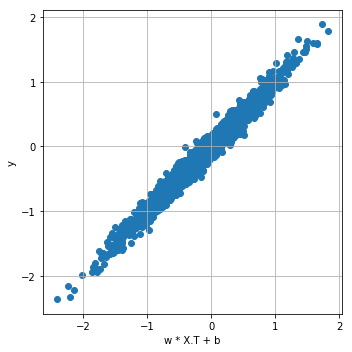

In [38]:
plt.figure(figsize=[5,5])
plt.xlabel('w * X.T + b')
plt.ylabel('y')
plt.scatter(temp, y_data)
plt.grid(True)
plt.tight_layout()
plt.show()

### Optimization goal
- Given x_data and y_data, we want to find w_real and b_real 

In [35]:
# training to predict
NUM_STEPS = 10

x = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y_true = tf.placeholder(dtype=tf.float32, shape=None)

with tf.name_scope('inference') as scope:
    w = tf.Variable([[0,0,0]],dtype=tf.float32, name='weights')
    b = tf.Variable(0, dtype=tf.float32, name='bias')
    y_pred = tf.matmul(w, tf.transpose(x)) + b

### Loss function
- Mean squared error
- Cross entropy

In [36]:
with tf.name_scope('mse') as scope:
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))

In [37]:
with tf.name_scope('cross_entropy') as scope:
    cross_entropy_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred))

### Training

In [38]:
with tf.name_scope('train') as scope:
    learning_rate = 0.5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train = optimizer.minimize(mse_loss)

In [39]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(NUM_STEPS):
        sess.run(train, feed_dict={x:x_data, y_true:y_data})
        if step % 5 == 0:
            print step, sess.run([w, b])
            
    print 10, sess.run([w, b])

0 [array([[0.3105729 , 0.49970657, 0.08790597]], dtype=float32), -0.21092714]
5 [array([[0.29926383, 0.49876568, 0.09481297]], dtype=float32), -0.1982763]
10 [array([[0.29926383, 0.49876568, 0.09481298]], dtype=float32), -0.1982763]


# Optimization
### logistic regression

In [40]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [41]:
N = 2000
x_data = np.random.randn(N, 3)
w_real = [0.3, 0.5, 0.1]
b_real = -0.2
wxb = np.matmul(w_real, x_data.T) + b_real

y_data_pre_noise = sigmoid(wxb)
y_data = np.random.binomial(1, y_data_pre_noise)

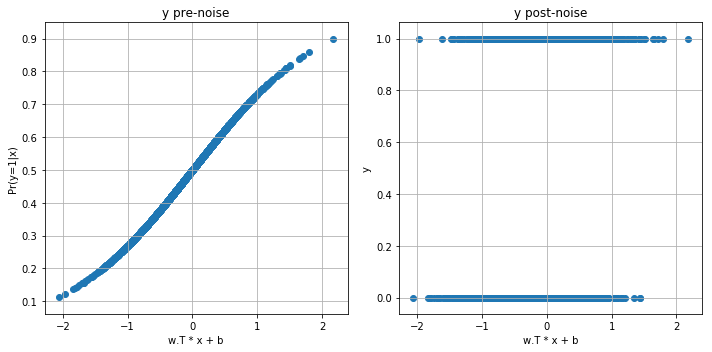

In [42]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title('y pre-noise')
plt.xlabel('w.T * x + b')
plt.ylabel('Pr(y=1|x)')
plt.scatter(wxb, y_data_pre_noise)
plt.grid(True)

plt.subplot(1,2,2)
plt.title('y post-noise')
plt.xlabel('w.T * x + b')
plt.ylabel('y')
plt.scatter(wxb, y_data)
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
NUM_STEPS = 50

x = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y_true = tf.placeholder(dtype=tf.float32, shape=None)

with tf.name_scope('inference') as scope:
    w = tf.Variable([[0,0,0]],dtype=tf.float32, name='weights')
    b = tf.Variable(0, dtype=tf.float32, name='bias')
    y_pred = tf.matmul(w, tf.transpose(x)) + b

with tf.name_scope('loss'):
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred)
    loss = tf.reduce_mean(loss)
    
with tf.name_scope('train') as scope:
    learning_rate = 0.5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train = optimizer.minimize(loss)
    
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(NUM_STEPS):
        sess.run(train, {x:x_data, y_true:y_data})
        if step % 5 == 0:
            print (step, sess.run([w, b]))
            
    print (50, sess.run([w, b]))


(0, [array([[0.03531037, 0.05989414, 0.00871425]], dtype=float32), -0.02725])
(5, [array([[0.15451796, 0.26329753, 0.03964205]], dtype=float32), -0.12354487])
(10, [array([[0.21670775, 0.3705548 , 0.05726023]], dtype=float32), -0.17757638])
(15, [array([[0.2507458 , 0.42986125, 0.06770609]], dtype=float32), -0.20892145])
(20, [array([[0.2699842 , 0.4637024 , 0.07404341]], dtype=float32), -0.2274949])
(25, [array([[0.28107464, 0.48338377, 0.0779311 ]], dtype=float32), -0.23863155])
(30, [array([[0.28754628, 0.49496192, 0.08032685]], dtype=float32), -0.24535105])
(35, [array([[0.29135165, 0.5018208 , 0.08180471]], dtype=float32), -0.24941792])
(40, [array([[0.29360032, 0.5059016 , 0.08271566]], dtype=float32), -0.25188252])
(45, [array([[0.29493356, 0.508336  , 0.08327626]], dtype=float32), -0.25337657])
(50, [array([[0.29559845, 0.5095565 , 0.08356448]], dtype=float32), -0.25413534])
